# Student Information
Name: 高靖雅/Riley Kao/Ching-Ya, Kao

Student ID: 109078501

GitHub ID: chinyakao

Kaggle name: Riley_Kao

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

# Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [2]:
# for google colaboratory connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load package
import numpy as np
import pandas as pd

## First - Take Home Exercises

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
### testing data
anger_test = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


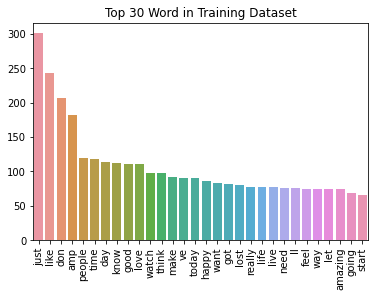

In [ ]:
# count and plot the top 30 words in training dataset
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# count
train_cv = CountVectorizer(max_features=30, stop_words = 'english')
X_train_counts = train_cv.fit_transform(train_df.text)

# sort
train_30 = pd.DataFrame(columns = train_cv.get_feature_names(),
             data = X_train_counts.toarray()).sum().sort_values(ascending=False)

# plot
g = sns.barplot(x=train_30.index, y=train_30)
g.set_xticklabels(train_30.index, rotation = 90);
plt.title("Top 30 Word in Training Dataset")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


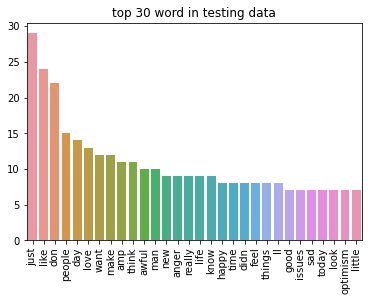

In [ ]:
# count and plot the top 30 words in training dataset

# count
test_vc = CountVectorizer(max_features=30, stop_words = 'english')
X_test_counts = test_vc.fit_transform(test_df.text)

# sort
test_30 = pd.DataFrame(columns = test_vc.get_feature_names(), 
            data = X_test_counts.toarray()).sum().sort_values(ascending=False)

# plot
g = sns.barplot(x=test_30.index, y=test_30)
g.set_xticklabels(test_30.index, rotation = 90);
plt.title("top 30 word in testing data")
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# count train dataset
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit_transform(train_df.text)

tfidf_vect.get_feature_names()[100:110]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### ** >>> Exercise 3 (Take home): **  
![](confusion_matrix.png)
Can you interpret the results above? What do they mean?

1. This counfusion matrix can tells us how well the model can predict each emotion. The X-axis shows the true label and the Y-axis shows the predicted label which is the result from the model.
2. Take one true positive(TP) for example: in the first block, on the top-left side shows the 59. It tells us that there are 59 records' true label are "anger" and the predicted label also predicts it as "anger". 
3. Except diagonal from (top-left to bottom-right), the cells are false positive which means that they do not predict it correct.
4. It seems that the fear correct results(72) are better than the other emotions. But, all the fear result is the largest number of results(12+72+13+10=107). As for the propotion, it is 0.673 which is not really better than others. It is not really good at predicting fear emotion.


---
### ** >>> Exercise 4 (Take home): **
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# build analyzer
import nltk
nltk.download('punkt')

tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_vect.fit(train_df.text) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
X_train = tfidf_vect.transform(train_df.text)
X_test = tfidf_vect.transform(test_df.text)
y_train = train_df['emotion']
y_test = test_df['emotion']

# check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [ ]:
# train model and predict
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.86
testing accuracy: 0.76
              precision    recall  f1-score   support

       anger       0.87      0.70      0.78        84
        fear       0.67      0.93      0.78       110
         joy       0.84      0.73      0.78        79
     sadness       0.79      0.62      0.70        74

    accuracy                           0.76       347
   macro avg       0.79      0.75      0.76       347
weighted avg       0.78      0.76      0.76       347



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


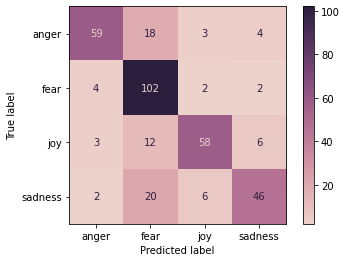

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

---
### ** >>> Exercise 5 (Take home): **
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

  - Naive Bayes overall f1-score is higher than Decision Tree
  - A model fits well doesn't mean that a model can predict well.
  - Decision tree overfit the dataset because it may be too deep subtree. Therefore the generalized ability isn't good for the vanilla decision tree in this case. 

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pic3.png" style="width: 300px;"/> </td>
    <td><img src="pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [ ]:
training_log = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/training_log.csv")
training_log.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.664822,0.975291,0.674352,0.887694
1,1,0.804041,0.570481,0.723343,0.762746
2,2,0.852477,0.401140,0.697406,0.785778
3,3,0.886244,0.319347,0.700288,0.817940
4,4,0.912815,0.253418,0.691643,0.866082


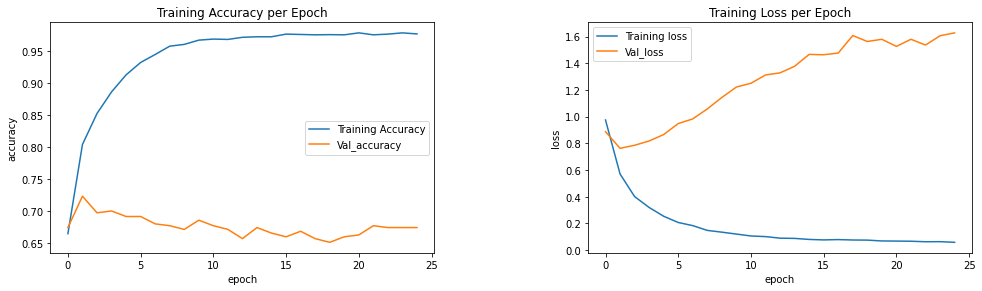

In [ ]:
# set figure position
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)

# accuracy
ax1.plot(training_log.epoch, training_log.accuracy, training_log.epoch, training_log.val_accuracy)
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.legend(["Training Accuracy", "Val_accuracy"])
ax1.set_title("Training Accuracy per Epoch")

# loss
ax2.plot(training_log.epoch, training_log.loss, training_log.epoch, training_log.val_loss)
ax2.set_xlabel("epoch")
ax2.set_ylabel("loss")
ax2.legend(["Training loss", "Val_loss"])
ax2.set_title("Training Loss per Epoch")

fig.show()

- Classical in the Overfitting Issue:

  Training accuracy increases as the model iterates and becomes more fitting to the training set. Around epoch 5, it comes really overfitting. The validation accuracy is still at the same level and even decreases a little bit at the same time. When the training loss down to almost zero, the vlaidation loss strongly increases.

- More iteration doesn't guarantee bringing performance in training deep learning models.


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
!pip install wget==3.2

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=c4befdd4421354689a16895ab6a781b814597732263497e09982f6596788a205
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
# following are the code for google colaboratory to download GoogleNews-vectors-negative300
import os
import wget
import gzip
import shutil

gn_vec_path = "GoogleNews-vectors-negative300.bin"
if not os.path.exists("GoogleNews-vectors-negative300.bin"):
    if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin"):
        #Downloading the reqired model
        if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin.gz"):
            if not os.path.exists("GoogleNews-vectors-negative300.bin.gz"):
                wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
            gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
        else:
            gn_vec_zip_path = "../Ch2/GoogleNews-vectors-negative300.bin.gz"
        #Extracting the required model
        with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        gn_vec_path = "../Ch2/" + gn_vec_path

print(f"Model at {gn_vec_path}")

Model at GoogleNews-vectors-negative300.bin


In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = gn_vec_path
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [ ]:
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop = stopwords.words('english')

# define a tokenizer for turning the data to tokenize and deleting the stopwords
def tokenizer(text):
    return [ w for w in re.split('\s+', text.strip()) \
            if w not in stop]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_df['unigrams'] = train_df['text'].apply(tokenizer)
test_df['unigrams'] = test_df['text'].apply(tokenizer)
train_df.head()

,id,text,emotion,intensity,unigrams,sent_vec
3496,40669,@BillSwindell @DePauwU @dick_nixon I was havin...,sadness,0.292,"[@BillSwindell, @DePauwU, @dick_nixon, I, brea...","[-0.013392857142857142, 0.05064610072544643, 0..."
790,10790,@serendipity127_ @zombiecalorie @Angel_Eyes66 ...,anger,0.271,"[@serendipity127_, @zombiecalorie, @Angel_Eyes...","[0.060009765625, 0.033203125, 0.0189453125, 0...."
2053,30049,Wishing a very Happy Birthday to our awesome d...,joy,0.833,"[Wishing, Happy, Birthday, awesome, dancer,, R...","[-0.0625, 0.06940569196428571, 0.0140555245535..."
1618,20761,"@Policy_Exchange A plus point, she won't have ...",fear,0.396,"[@Policy_Exchange, A, plus, point,, queue, loo...","[0.011983598981584822, 0.06436593191964286, 0...."
317,10317,@jwolfie_ why you gotta use the dark skin emoj...,anger,0.525,"[@jwolfie_, gotta, use, dark, skin, emoji, #of...","[0.09111328125, 0.078515625, 0.06982421875, 0...."


In [ ]:
# define a function for computing the sentence vector
import numpy as np
def sentence2vec(unigram):
 count = 0
 vec = np.zeros((300))
 for i in range(0, len(unigram)):
  try:
   vec += w2v_google_model[unigram[i]]
   count += 1
  except KeyError:
   pass
 vec /= count
 return vec
            

In [ ]:
train_df['sent_vec'] = train_df["unigrams"].apply(sentence2vec)
train_df['sent_vec'].apply(pd.Series).fillna(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
3496,-0.013393,0.050646,0.009277,0.238211,0.095843,-0.090777,0.024100,-0.079590,0.082206,0.154088,0.041176,-0.195382,0.078360,-0.033447,-0.101127,0.139997,0.035941,0.082764,0.100133,-0.086286,-0.007847,0.179563,0.136579,-0.016648,0.012397,-0.022474,-0.107352,0.079381,0.006592,0.073024,-0.010254,0.023228,-0.039664,-0.038804,-0.033691,0.124023,0.182670,0.034668,-0.056375,0.189872,...,-0.082227,0.016183,0.044643,0.061297,0.029524,0.099819,-0.008510,0.065499,-0.094674,0.087751,-0.124512,0.116106,0.167132,-0.001574,-0.031145,-0.085754,-0.072876,-0.167829,0.030134,-0.045415,-0.041591,0.055695,-0.010498,0.125157,0.044852,-0.013218,-0.051304,0.006348,-0.120117,0.093401,-0.078962,0.043387,-0.172799,0.040423,-0.104178,-0.098598,-0.055385,-0.010158,0.064314,-0.055577
790,0.060010,0.033203,0.018945,0.209766,-0.103027,0.119678,-0.057520,-0.061914,0.071289,0.020770,-0.171729,-0.197559,-0.125879,-0.017719,-0.052551,0.060010,-0.049658,0.054688,0.027441,-0.162109,-0.017920,0.152722,0.353467,-0.011328,-0.098193,0.003101,-0.156250,0.078040,0.072241,-0.081543,-0.092834,0.068250,-0.027539,0.138379,0.070605,0.065820,-0.022388,0.038525,0.114417,0.053247,...,0.001465,-0.087598,0.017554,-0.101123,-0.064966,0.011475,-0.110358,-0.138501,-0.102454,-0.060840,-0.157666,0.105493,0.172437,0.018604,0.100439,-0.046240,-0.174072,-0.171387,-0.088672,0.283105,0.019873,0.058350,0.012457,0.016602,0.075781,0.045508,0.043262,-0.119409,-0.046033,-0.062158,-0.088699,0.166211,-0.064990,-0.064673,0.027631,-0.243701,-0.098364,-0.142676,-0.048926,0.127173
2053,-0.062500,0.069406,0.014056,0.168666,0.028678,-0.017508,0.107213,-0.049351,-0.006165,0.000035,-0.108852,0.000628,-0.001081,0.013149,0.046945,0.049770,0.087472,0.165492,-0.013428,-0.015796,0.041242,0.201202,0.192662,-0.075509,0.089355,-0.014457,-0.029681,-0.014893,0.096872,-0.131752,-0.104597,-0.072231,0.063250,0.016887,-0.006592,0.030746,0.113525,-0.027884,0.049282,0.080165,...,-0.158726,0.009696,-0.018786,0.064104,0.020255,0.123143,0.015642,0.074951,-0.146066,0.140058,0.130284,0.079563,0.190360,0.066345,0.168265,-0.022670,0.022025,-0.115740,0.022888,-0.048532,-0.064261,0.040615,-0.142404,0.068185,0.073347,0.045868,-0.069815,0.045741,0.045829,0.093157,0.061907,0.094884,-0.156494,-0.033473,-0.000802,-0.082066,-0.101807,-0.089774,0.016183,-0.038731
1618,0.011984,0.064366,0.048296,0.142962,-0.037005,-0.014709,-0.030901,-0.082799,0.013149,0.125244,-0.056083,-0.101004,-0.014927,0.014701,-0.126334,0.128104,0.157209,0.009260,0.047642,-0.051618,-0.131173,-0.006836,0.015250,0.014718,0.061035,-0.061717,-0.196350,0.119489,0.014125,0.046387,-0.012259,0.012939,-0.035113,-0.005399,-0.034302,-0.015852,0.016392,0.082947,-0.032680,0.024484,...,-0.064139,-0.006801,-0.110944,-0.042498,-0.059989,0.065186,0.031913,0.073312,-0.154506,-0.104353,-0.010518,0.196987,0.049072,-0.054897,0.127232,-0.012521,0.016288,-0.108241,-0.035134,-0.003087,0.001604,0.003575,0.018066,0.147252,0.021657,0.016183,-0.110979,-0.031180,-0.027954,0.006561,-0.019444,0.143345,-0.019409,0.078561,0.098284,-0.093541,0.001456,0.025670,-0.079206,-0.010568
317,0.091113,0.078516,0.069824,0.045117,-0.147803,0.029663,0.040485,-0.098877,0.043262,0.068860,-0.061157,-0.009314,-0.116748,-0.087109,-0.103174,0.009967,0.016772,0.218848,-0.085229,-0.111914,-0.081592,-0.003827,0.091016,-0.021045,-0.143896,-0.076385,0.047021,0.089844,-0.018701,-0.157617,-0.134424,0.100403,0.026147,-0.052881,0.002875,-0.026807,0.025623,0.000732,0.011719,0.044580,...,-0.052393,-0.128904,-0.079468,0.010840,-0.000464,0.043115,-0.051196,-0.122681,-0.118628,-0.041699,0.041162,0.078503,0.038306,0.131348,0.112744,-0.094824,-0.105170,-0.085522,-0.136377,0.057690,0.087158,0.060107,0.090283,0.049292,-0.010229,-0.023817,-0.019160,0.037390,-0.04

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
w2v_google_model.most_similar('happy', topn=15)

[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043),
 ('happier', 0.6244627237319946),
 ('Said_Hirschbeck', 0.6234509348869324),
 ('elated', 0.619601845741272),
 ('thankful', 0.6178935766220093),
 ('unhappy', 0.6128038167953491)]

In [ ]:
# top 60 words of each category (15*4=60)
topn = 15
anger_words = ['anger'] + [word_ for word_, sim_ in w2v_google_model.most_similar('anger', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

# target words
target_words = anger_words + happy_words + sad_words + fear_words

# color list
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

In [ ]:
# train model
from sklearn.manifold import TSNE
X_train = w2v_google_model[target_words]
target_size = len(target_words)

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


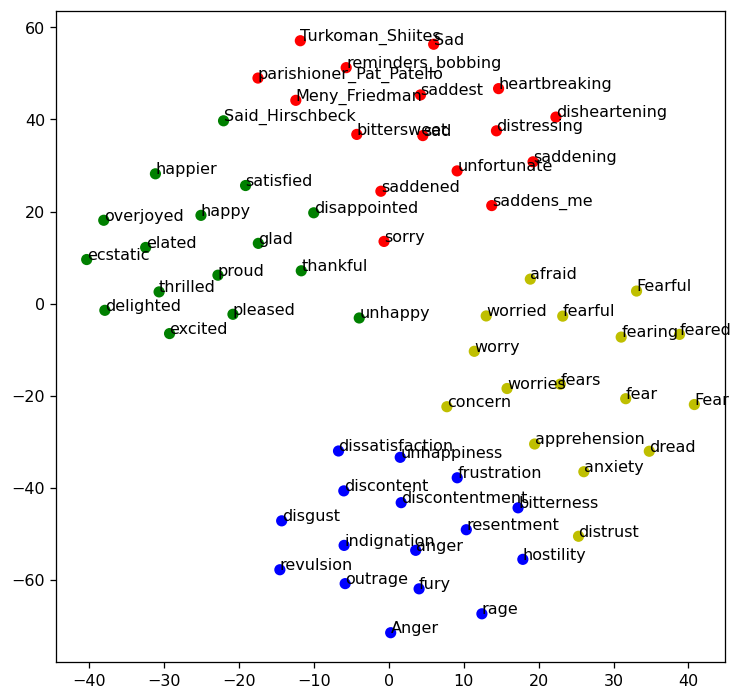

In [ ]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second - Kaggle competition
In this competition, we provide a dataset which was crawled from Twitter, and we have already labeled the emotion for these tweets by some specific hashtags in the original text. There are 8 classes (or say emotions) in our dataset: anger, anticipation, disgust, fear, sadness, surprise, trust, and joy.

You have to clean the data by doing some pre-processing first. Then, apply feature engineering or any other data mining technique you have or haven't learned in the Data Mining course. The final goal is to learn a model that is able to predict the emotion behind each tweet.

## Third - Kaggle Competition Report

I have tried several model for testing. DNN_model_1 has the highest result. Following are the models' details:
- lightGBM_model_1: TFIDF top 5000 words and train lightGBM
  - score: 0.41699
- DNN_model_1: Bow top 5000 words
  - score: 0.43336
- DNN_model_2: Bow top 5000 words filer out stopwords, punctuation and digits
  - score: 0.41832
- DNN_model_3: Bow top 3000 words filer out stopwords, punctuation and digits
  - score: 0.20571
- DNN_model_4: Bow top 3000 words filer out stopwords and punctuation
  - score: 0.41699

I also save all the models in the file. You can try the model as you want.

### Data preparation

In [20]:
# import json file
tweets = pd.read_json("/content/drive/MyDrive/110-1/DataMining/kaggle/kaggle_data/tweets_DM.json", lines=True)
source = pd.json_normalize(tweets['_source'])
source.head()

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [21]:
# import data identification file
partition = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/kaggle/kaggle_data/data_identification.csv", sep=",")
partition.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [22]:
# import emotion file 
emotion = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/kaggle/kaggle_data/emotion.csv", sep=",")
emotion.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [23]:
# join source table with partition table and emotion table
source = source.merge(emotion, left_on = "tweet.tweet_id", right_on = "tweet_id", how = "left")
source = source.merge(partition, left_on = "tweet.tweet_id", right_on = "tweet_id", how = "left")
# drop duplicate columns
source = source.drop(columns=['tweet_id_x', 'tweet_id_y'])
source.head()

,tweet.hashtags,tweet.tweet_id,tweet.text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test


In [24]:
# split the joined table into train set and test set, eliminating unnecessary columns
train_df = source.query('identification == "train"').drop(columns=['identification'])
test_df = source.query('identification == "test"').drop(columns=['identification','emotion'])

In [25]:
# rename the column
train_df = train_df.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "id", "tweet.text":"text"})
test_df = test_df.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "id", "tweet.text":"text"})

In [26]:
# clean up memory
del tweets
del source
del emotion
del partition

In [27]:
# export and save those steps for next try
train_df.to_csv('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/train_df.csv', encoding='utf-8', index=False)
test_df.to_csv('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/test_df.csv', encoding='utf-8', index=False)

In [28]:
# shuffle the data
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### Data Cleaning

In [29]:
train_df

,hashtags,id,text,emotion
1225819,[],0x2f78c5,"""Love's greatest gift is its ability to make e...",joy
691529,[North],0x2d30d4,I <LH> the #North no matter its defects and whims,joy
373368,[ManchesterPride2017],0x2ab55e,<LH> is the golden thread that ties our hearts...,joy
421113,[],0x25ad1c,Stomach issues today.. but what's new. <LH>,anger
941353,[],0x2d66fa,Struggling to pick myself up for the last nigh...,disgust
...,...,...,...,...
801791,[dontquit],0x254a5c,“Winning is growing. Growing is living.” @this...,trust
1621642,"[badmorning, BadDay, WTFIsHappening]",0x201cc3,If this day isn't bad enough already I end up ...,disgust
1283703,[],0x280255,"Let me get the ""bonnection"" best line of <LH> ...",fear
1843987,[],0x259c58,@MikeSonko @EAukot Make him your director he w...,sadness


In [30]:
# clean train data
import re

# remove <LH>
train_df['text'] = train_df['text'].apply(lambda x: x.replace('<LH>', ''))

# filter out all the stopwords and convert all words to lowercase
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
train_df['temp'] = train_df['text'].apply(lambda x: [word.lower() for word in x.split() if not word in stopwords])
train_df['text'] = train_df['temp'].apply(lambda x: ' '.join(x))
train_df = train_df.drop(columns=['temp'])

# remove punctuation
import string
punctuation_string = string.punctuation
for i in punctuation_string:
  train_df['text'] = train_df['text'].apply(lambda x: x.replace(i, ''))

train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,hashtags,id,text,emotion
1225819,[],0x2f78c5,loves greatest gift ability make everything to...,joy
691529,[North],0x2d30d4,i north matter defects whims,joy
373368,[ManchesterPride2017],0x2ab55e,golden thread ties hearts souls together moth...,joy
421113,[],0x25ad1c,stomach issues today whats new,anger
941353,[],0x2d66fa,struggling pick last night 🤒,disgust


In [31]:
train_df

,hashtags,id,text,emotion
1225819,[],0x2f78c5,loves greatest gift ability make everything to...,joy
691529,[North],0x2d30d4,i north matter defects whims,joy
373368,[ManchesterPride2017],0x2ab55e,golden thread ties hearts souls together moth...,joy
421113,[],0x25ad1c,stomach issues today whats new,anger
941353,[],0x2d66fa,struggling pick last night 🤒,disgust
...,...,...,...,...
801791,[dontquit],0x254a5c,“winning growing growing living” thisisdtez do...,trust
1621642,"[badmorning, BadDay, WTFIsHappening]",0x201cc3,if day bad enough already i end bumping someon...,disgust
1283703,[],0x280255,let get bonnection best line last night 😂😂😂,fear
1843987,[],0x259c58,mikesonko eaukot make director help organize cbd,sadness


In [32]:
# clean test data

# remove <LH>
test_df['text'] = test_df['text'].apply(lambda x: x.replace('<LH>', ''))

# filter out all the stopwords and convert all words to lowercase
test_df['temp'] = test_df['text'].apply(lambda x: [word.lower() for word in x.split() if not word in stopwords])
test_df['text'] = test_df['temp'].apply(lambda x: ' '.join(x))
test_df = test_df.drop(columns=['temp'])

# remove punctuation
for i in punctuation_string:
  test_df['text'] = test_df['text'].apply(lambda x: x.replace(i, ''))
del punctuation_string

test_df.head()

,hashtags,id,text
990956,[],0x20bc98,work buys everyone food ur friend hides u bc ...
825922,[MyTranslation],0x22924b,if jeff bezos offered love wealth house he wou...
225259,[],0x211d16,i i would loose track also forget important i ...
1610250,"[bucketlist, itwillhappen]",0x228e37,i know moment sometime future i theavettbros r...
359603,[],0x29aa87,therealfly how could russian troll ads possibl...


In [33]:
# export cleaned data
train_df.to_csv('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/train_clean_df.csv', encoding='utf-8', index=False)
test_df.to_csv('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/test_clean_df.csv', encoding='utf-8', index=False)

### Create validation set

In [35]:
# check total length
train_df.shape

(1455563, 4)

In [36]:
# create validation dataset
train_test_part = int(len(train_df)*0.9)
train_df, valid_df = train_df[:train_test_part], train_df[train_test_part:]
# check length
train_df.shape

(1310006, 4)

### Feature engineering (Bag of Words)

In [37]:
%%time
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')

BOW = CountVectorizer(max_features=3000, tokenizer=nltk.word_tokenize)

# apply analyzer to training set
BOW.fit(train_df['text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
CPU times: user 3min 14s, sys: 890 ms, total: 3min 15s
Wall time: 3min 23s


In [38]:
# check top words
feature_names = BOW.get_feature_names()
feature_names[0:100]

['0',
 '01',
 '016',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '0800am',
 '09',
 '1',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '103',
 '104',
 '11',
 '110',
 '12',
 '13',
 '1313',
 '14',
 '140',
 '142',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '2',
 '20',
 '200',
 '2017',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '251',
 '252',
 '26',
 '27',
 '28',
 '280',
 '29',
 '2nd',
 '3',
 '30',
 '31',
 '32',
 '33',
 '35',
 '37',
 '38',
 '39',
 '3rd',
 '4',
 '40',
 '40404',
 '41',
 '45',
 '48',
 '4th',
 '5',
 '50',
 '500',
 '6',
 '60',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '8',
 '80',
 '9',
 '90',
 '99',
 'a',
 'abc',
 'ability',
 'able',
 'about',
 'absolute',
 'absolutely',
 'abt',
 'abundance',
 'abuse',
 'accept']

### Build Model

In [39]:
%%time
# prepare train set
X_train = BOW.transform(train_df['text'])
y_train = train_df['emotion']
X_valid = BOW.transform(valid_df['text'])
y_valid = valid_df['emotion']

X_test = BOW.transform(test_df['text'])

# check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)
print('X_test.shape: ',  X_test.shape)

X_train.shape:  (1310006, 3000)
y_train.shape:  (1310006,)
X_valid.shape:  (145557, 3000)
y_valid.shape:  (145557,)
X_test.shape:  (411972, 3000)
CPU times: user 4min 17s, sys: 640 ms, total: 4min 18s
Wall time: 4min 26s


In [40]:
# deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1225819      joy
691529       joy
373368       joy
421113     anger
Name: emotion, dtype: object

y_train.shape:  (1310006,)
y_valid.shape:  (145557,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (1310006, 8)
y_valid.shape:  (145557, 8)


In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3000
output_shape:  8


In [42]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 64)                192064    
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0     

### Train Model

In [43]:
%%time
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/training_log_kaggle.csv')

epochs = 25
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
            callbacks=[csv_logger], validation_data = (X_valid, y_valid))
print('training finish') 

Epoch 1/25
40938/40938 [==============================] - 305s 7ms/step - loss: 1.3750 - accuracy: 0.5005 - val_loss: 1.3475 - val_accuracy: 0.5102
Epoch 2/25
40938/40938 [==============================] - 363s 9ms/step - loss: 1.3246 - accuracy: 0.5189 - val_loss: 1.3353 - val_accuracy: 0.5156
Epoch 3/25
40938/40938 [==============================] - 409s 10ms/step - loss: 1.3035 - accuracy: 0.5268 - val_loss: 1.3338 - val_accuracy: 0.5166
Epoch 4/25
40938/40938 [==============================] - 203s 5ms/step - loss: 1.2892 - accuracy: 0.5322 - val_loss: 1.3396 - val_accuracy: 0.5159
Epoch 5/25
40938/40938 [==============================] - 200s 5ms/step - loss: 1.2783 - accuracy: 0.5364 - val_loss: 1.3407 - val_accuracy: 0.5146
Epoch 6/25
40938/40938 [==============================] - 194s 5ms/step - loss: 1.2695 - accuracy: 0.5405 - val_loss: 1.3423 - val_accuracy: 0.5162
Epoch 7/25
40938/40938 [==============================] - 193s 5ms/step - loss: 1.2622 - accuracy: 0.5432 - val

In [59]:
# save the model
import joblib

filename = '/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/DNN_model_4.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://39975a7a-808a-41ba-9723-116936644049/assets


['/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/model_4.sav']

### Predict Test Set 

In [60]:
# load the model
import joblib
filename = '/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/DNN_model_4.sav'

model = joblib.load(filename)
model

In [62]:
# predict and decode labels
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
pred_result

array(['joy', 'joy', 'trust', ..., 'joy', 'joy', 'anticipation'],
      dtype=object)

In [63]:
# preparing data for export
test_df_t = test_df.drop(columns=['hashtags', 'text'])
test_df_t['emotion'] = pred_result
test_df_t


,id,emotion
990956,0x20bc98,joy
825922,0x22924b,joy
225259,0x211d16,trust
1610250,0x228e37,joy
359603,0x29aa87,sadness
...,...,...
1865204,0x27edac,trust
1814405,0x1fd898,joy
274588,0x37d7d1,joy
126801,0x37542c,joy


In [64]:
# export 
pd.DataFrame(test_df_t).to_csv('/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/test_pred_model4.csv', encoding='utf-8', index=False)

### Evaluate the model through trainning log
Take DNN_model_4's trainning log as example. We can find that it also happened classic overfitting results 

In [50]:
# training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/MyDrive/110-1/DataMining/DM2021-Lab2-HW2/kaggle/training_log_kaggle.csv")

training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.500537,1.375043,0.510192,1.347550
1,1,0.518865,1.324597,0.515633,1.335323
2,2,0.526847,1.303545,0.516629,1.333754
3,3,0.532172,1.289184,0.515949,1.339558
4,4,0.536449,1.278319,0.514609,1.340717
5,5,0.540455,1.269532,0.516169,1.342325
6,6,0.543180,1.262169,0.515063,1.347765
7,7,0.545568,1.256203,0.512885,1.348836
8,8,0.547638,1.250671,0.513146,1.351776
9,9,0.549489,1.246338,0.511401,1.359176


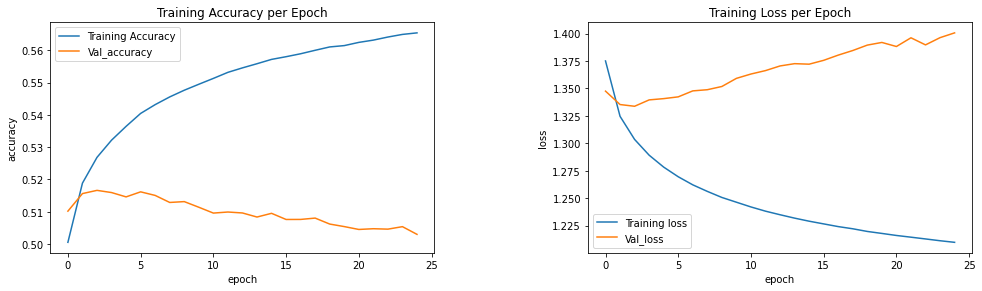

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# set figure position
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)

# accuracy
ax1.plot(training_log.epoch, training_log.accuracy, training_log.epoch, training_log.val_accuracy)
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.legend(["Training Accuracy", "Val_accuracy"])
ax1.set_title("Training Accuracy per Epoch")

# loss
ax2.plot(training_log.epoch, training_log.loss, training_log.epoch, training_log.val_loss)
ax2.set_xlabel("epoch")
ax2.set_ylabel("loss")
ax2.legend(["Training loss", "Val_loss"])
ax2.set_title("Training Loss per Epoch")

fig.show()

In [ ]:
# End of file